In [114]:
import pandas as pd

file_path = "./dataset/CAC40_stocks_2021_2023.csv"
data = pd.read_csv(file_path)
validation_days = 20   # Nombre de jours de validation

# Data preprocessing
specific_stock = 'AC.PA'  # Remplacez par le nom du stock souhaité
if 'Stock' in data.columns:  # Vérifiez que la colonne existe
    data = data[data['Stock'] == specific_stock]
data_minus_validation = data[:-validation_days]
data_minus_validation

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
0,2020-04-08,28.559999,28.559999,26.639999,28.270000,28.270000,1051666.0,AC.PA
1,2020-04-09,28.629999,29.570000,28.049999,28.639999,28.639999,990955.0,AC.PA
2,2020-04-14,28.010000,28.340000,27.150000,27.590000,27.590000,907178.0,AC.PA
3,2020-04-15,27.170000,27.299999,25.459999,25.660000,25.660000,1378290.0,AC.PA
4,2020-04-16,25.879999,26.700001,24.080000,24.570000,24.570000,1474307.0,AC.PA
...,...,...,...,...,...,...,...,...
747,2023-03-03,30.719999,31.100000,30.600000,30.990000,30.990000,956684.0,AC.PA
748,2023-03-06,31.750000,32.000000,31.389999,31.889999,31.889999,1110408.0,AC.PA
749,2023-03-07,31.750000,32.049999,31.580000,31.750000,31.750000,790351.0,AC.PA
750,2023-03-08,31.530001,31.790001,31.459999,31.580000,31.580000,696748.0,AC.PA


In [115]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

In [116]:
scaled_data = scaler.fit_transform(data_minus_validation['Close'].values.reshape(-1, 1)) 

In [117]:
import numpy as np

def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [118]:
time_step = 100
X, y = create_dataset(scaled_data, time_step)

In [119]:
train_size = 0.8

In [120]:
X_train, X_test = X[:int(X.shape[0]*train_size)], X[int(X.shape[0]*train_size):]
y_train, y_test = y[:int(y.shape[0]*train_size)], y[int(y.shape[0]*train_size):]

In [121]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=64, activation='relu'))
model.add(Dense(units=64))
model.add(Dense(units=1))

/home/abel/personnal_projects/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [122]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=150, batch_size=32)

Epoch 1/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.2720
Epoch 2/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0253
Epoch 3/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0146
Epoch 4/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0152
Epoch 5/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0111
Epoch 6/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0103
Epoch 7/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0093
Epoch 8/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0079
Epoch 9/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0083
Epoch 10/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0078
Epoch 11/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0073
Epoch 12/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0077
Epoch 13/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0064
Epoch 14/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0081
Epoch 15/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - lo

In [123]:
test_loss = model.evaluate(X_test, y_test)
test_loss

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0015 


0.0012349819298833609

In [124]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [125]:
original_data = data_minus_validation['Close'].values
predicted_data = np.empty_like(original_data)
predicted_data[:] = np.nan
predicted_data[-len(predictions):] = predictions.reshape(-1)

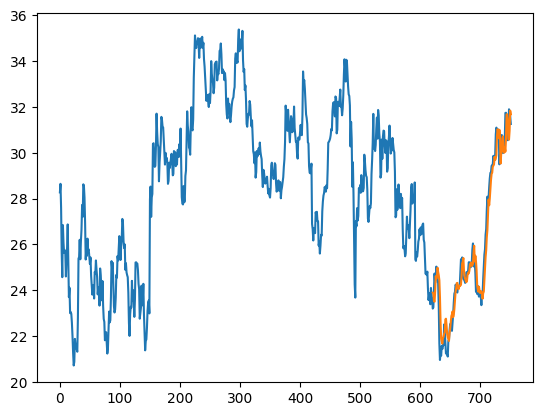

In [126]:
import matplotlib.pyplot as plt

plt.plot(original_data)
plt.plot(predicted_data)

In [127]:
new_predictions = model.predict(X_test[-validation_days:])
new_predictions = scaler.inverse_transform(new_predictions)
predicted_data = np.append(predicted_data, new_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


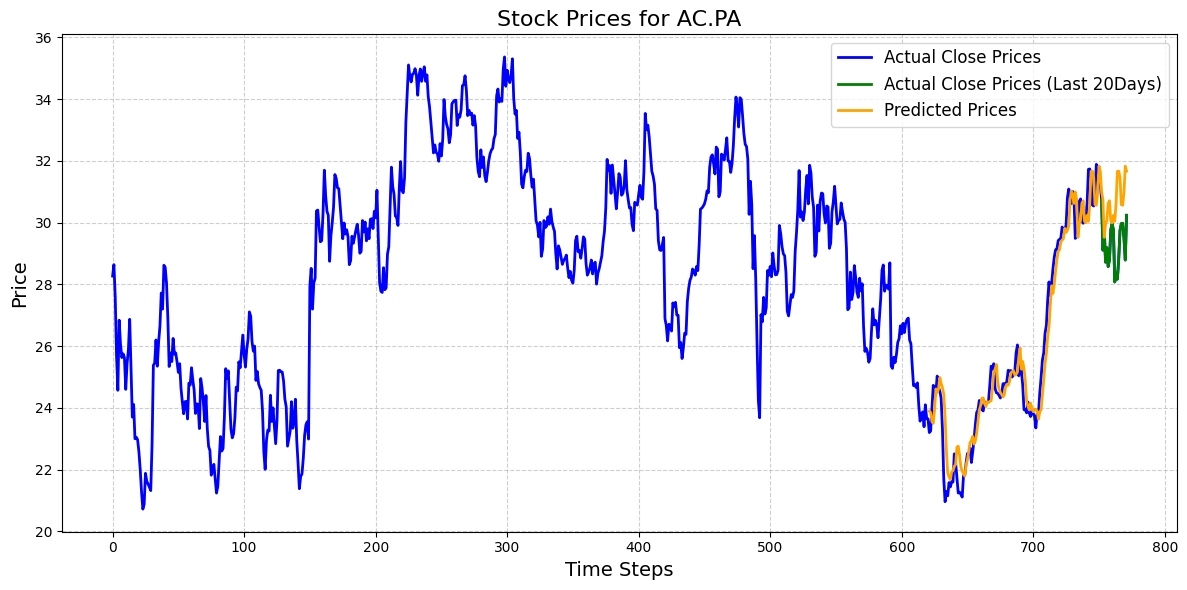

In [128]:
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the entire Actual Close Prices in blue
plt.plot(data['Close'].values, label='Actual Close Prices', color='blue', linewidth=2)

# Highlight the last validation_days of Actual Close Prices in green
plt.plot(range(len(data['Close']) - validation_days, len(data['Close'])), data['Close'].values[-validation_days:], color='green', linewidth=2, label=f'Actual Close Prices (Last {validation_days}Days)')

# Plot the Predicted Prices in orange
plt.plot(predicted_data, label='Predicted Prices', color='orange', linestyle='-', linewidth=2)

# Add labels, title, and legend
plt.title(f"Stock Prices for {specific_stock}", fontsize=16)
plt.xlabel("Time Steps", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid for better readability
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

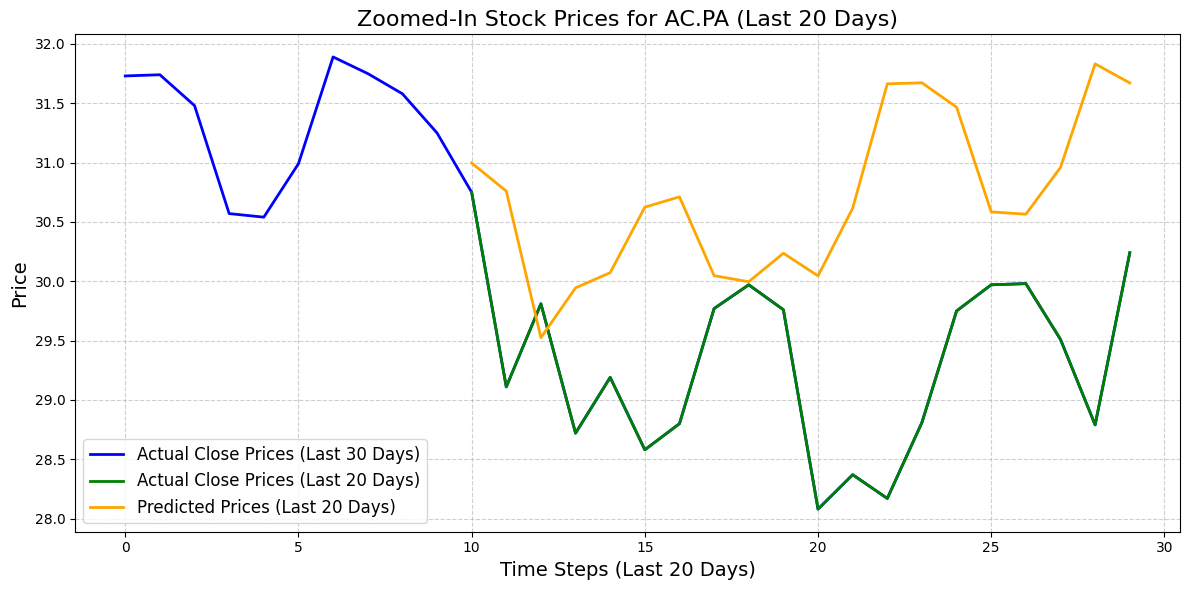

In [129]:
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot the last (validation_days + 10) days of Actual Close Prices in blue
plt.plot(data['Close'].values[-(validation_days + 10):], label=f'Actual Close Prices (Last {validation_days + 10} Days)', color='blue', linewidth=2)

# Plot the last validation_days of Actual Close Prices in green, starting after 10 days
plt.plot(range(10, 10 + validation_days), data['Close'].values[-validation_days:], label=f'Actual Close Prices (Last {validation_days} Days)', color='green', linewidth=2)

# Plot the last validation_days of Predicted Prices in orange, starting after 10 days
plt.plot(range(10, 10 + validation_days), predicted_data[-validation_days:], label=f'Predicted Prices (Last {validation_days} Days)', color='orange', linestyle='-', linewidth=2)

# Add labels, title, and legend
plt.title(f"Zoomed-In Stock Prices for {specific_stock} (Last {validation_days} Days)", fontsize=16)
plt.xlabel(f"Time Steps (Last {validation_days} Days)", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid for better readability
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()